# hierarchical clustering

In [29]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')



In [30]:
#cargar el dataset
Dataset = pd.read_csv("Mall_Customers.csv")

In [31]:
#Realizamos las lectura de los datos, seleccionamos la cantidad de filas del dataset, o la que deseamos ver
Dataset.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [32]:
Dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Visualizar relaciones entre variables


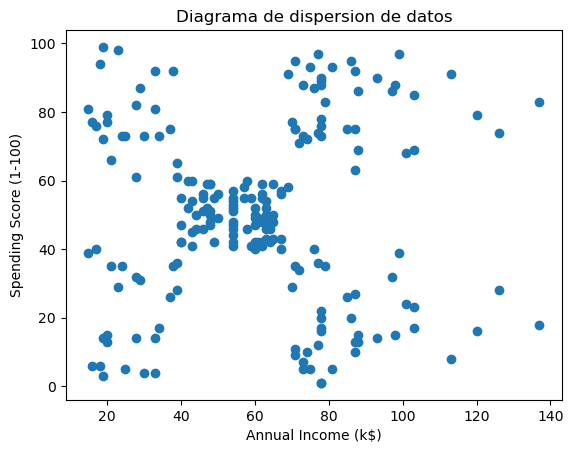

In [49]:
plt.scatter(Dataset['Annual Income (k$)'], Dataset['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Diagrama de dispersion de datos')
plt.show()

# No se presentan valores atipicos en este caso

In [51]:
#procesamiento de datos
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# No hay datos faltantes en este caso

# Normalizar los datos

In [54]:
scaler = StandardScaler()
Dataset_scaled = scaler.fit_transform(Dataset[['Annual Income (k$)', 'Spending Score (1-100)']])

# Entrenamiento del modelo

In [67]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy



# Configurar y entrenar el modelo de hierarchical clustering

In [69]:
model = AgglomerativeClustering(n_clusters=5)
clusters = model.fit_predict(Dataset.iloc[:, 2:])

# Evaluación del modelo

In [58]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calcular métricas

In [59]:
silhouette = silhouette_score(Dataset_scaled, model.labels_)
calinski_harabasz = calinski_harabasz_score(Dataset_scaled, model.labels_)
print("Coeficiente de Silhouette:", silhouette)
print("Índice de Calinski-Harabasz:", calinski_harabasz)

Coeficiente de Silhouette: 0.5538089226688662
Índice de Calinski-Harabasz: 244.41032586596822


#  Visualización de resultados

#  Visualización de resultados - Dendrograma

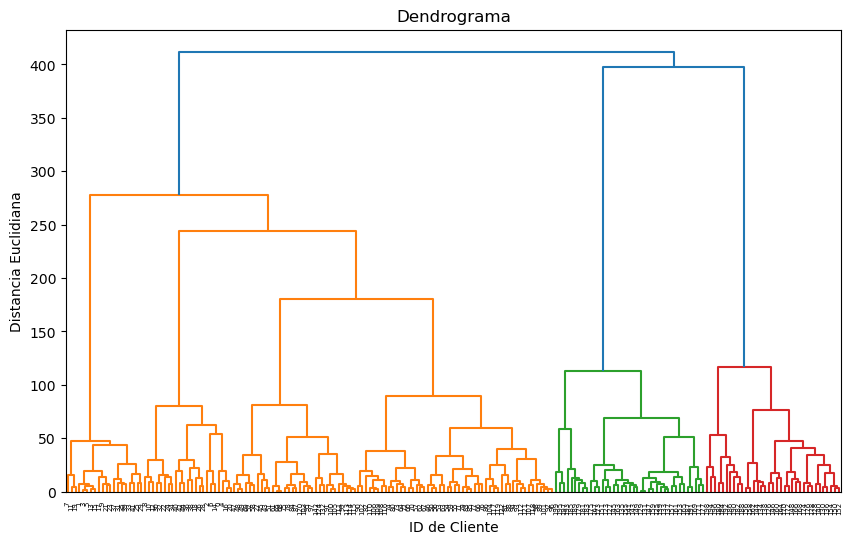

In [71]:
plt.figure(figsize=(10, 6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(Dataset.iloc[:, 2:], method='ward'))
plt.title('Dendrograma')
plt.xlabel('ID de Cliente')
plt.ylabel('Distancia Euclidiana')
plt.show()

# Visualizar los clusters en un scatter plot

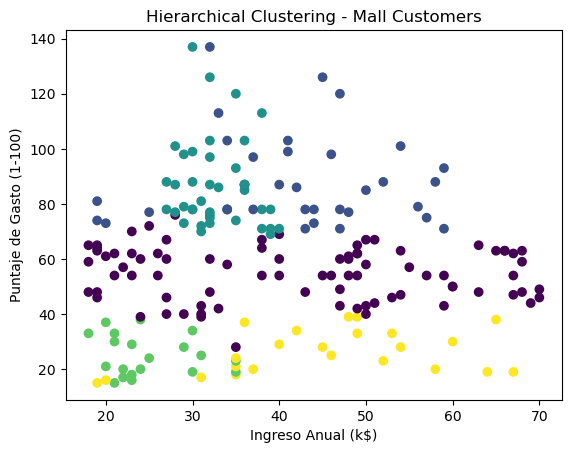

In [73]:
plt.scatter(Dataset.iloc[:, 2], Dataset.iloc[:, 3], c=clusters, cmap='viridis')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.title('Hierarchical Clustering - Mall Customers')
plt.show()